# TP1: Algoritmos de búsqueda en Torre de Hanoi
Integrantes: Fernando Vasconcelos, Federico Arias, Hernan Silva, Victoria Teran, Joaquin Viera y Lara Rosenberg

# Tareas y preguntas a resolver:
1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)
2. ¿Cuáles son las propiedades del entorno de trabajo?
3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.
4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.
5. ¿Qué complejidad en tiempo y memoria tiene el algoritmo elegido?
6. A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular promedio y desvío estándar de las métricas).
7. Si la solución óptima es $2^k - 1$ movimientos con k igual al número de discos. Qué tan lejos está la solución del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de trayecto usado).

#### 1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)


| Performance                                                                       | Enviroment | Actuators                                               | Sensors |
|-----------------------------------------------------------------------------------|------------|---------------------------------------------------------|---------|
| Ordenamiento correcto de los 5 discos (de menor a mayor) en la última varilla, idealmente de forma tal que minimice el costo (menor cantidad de movimientos posibles, un costo un movimiento).  |5 discos de distintos tamaños, 3 varillas.| Movimiento del agente de los discos de a uno a la vez. Ningún disco podrá colocarse encima de un disco que sea más pequeño que él. | Sensor de visualización del estado vigente y sensor que verifique que la última varilla no tenga todos los discos ordenados para seguir accionando.|

#### 2. ¿Cuáles son las propiedades del entorno de trabajo?
    • Totalmente observable: el agente tiene acceso a todo el environment en cada momento (puede ver la ubicacion de los discos en las varillas)
    • Determinista: el estado próximo está determinado por el estado actual, sin nivel de azar.
    • Secuencial: existe dependencia entre estados (el movimiento actual influye en los posibles estados futuros). Además, el movimiento no se puede hacer aisladamente sin considerar el estado actual. En este problema, los posibles movimientos de discos del agente, estan determinados por la ubicación actual de los discos.
    • Estático: el estado no cambia mientras el agente decide, es el agente quien cambia el estado. No hay factores externos que modifiquen el estado actual mientras no se ejerza una acción.  
    • Discreto: existe una cantidad finita de estados (243 estados totales) y acciones.
    • Agente único: el agente no interactua con otros y es único.

#### 3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.

Estado: son las diferentes disposiciones en que pueden estar los discos en las varas.
Estado inicial:
HanoiState: 5 4 3 2 1  |  |


Estado objetivo:
HanoiState |  | 5 4 3 2 1

Espacio de estado = 243 estados posibless: 3^5
 HanoiState: 5 4 3 2 1 |  | ,
 HanoiState: 5 4 3 2 |  | 1,
 HanoiState: 5 4 3 2 | 1 | ,
 HanoiState: 5 4 3 | 1 | 2,
 HanoiState: 5 4 3 | 2 | 1,
 HanoiState: 5 4 3 1 |  | 2,
 HanoiState: 5 4 3 1 | 2 | ,
 HanoiState: 5 4 3 | 2 1 | ,
 HanoiState: 5 4 3 |  | 2 1,
 HanoiState: 5 4 | 3 | 2 1,
 HanoiState: 5 4 | 2 1 | 3,
 HanoiState: 5 4 1 | 3 | 2,
 HanoiState: 5 4 1 | 2 | 3,
 HanoiState: 5 4 | 3 1 | 2,
 HanoiState: 5 4 | 2 | 3 1,
 HanoiState: 5 4 2 | 3 1 | ,
 HanoiState: 5 4 1 |  | 3 2,
 HanoiState: 5 4 1 | 3 2 | ,
 HanoiState: 5 4 2 |  | 3 1,
 HanoiState: 5 4 | 3 2 | 1,
 HanoiState: 5 4 | 1 | 3 2,
 HanoiState: 5 4 2 1 |  | 3,
 HanoiState: 5 4 2 | 1 | 3,
 HanoiState: 5 4 |  | 3 2 1,
 HanoiState: 5 4 | 3 2 1 | ,
 HanoiState: 5 4 2 1 | 3 | ,
 HanoiState: 5 4 2 | 3 | 1,
 HanoiState: 5 | 3 2 1 | 4,
 HanoiState: 5 | 4 | 3 2 1,
 HanoiState: 5 1 | 3 2 | 4,
 HanoiState: 5 1 | 4 | 3 2,
 HanoiState: 5 | 4 1 | 3 2,
 HanoiState: 5 | 3 2 | 4 1,
 HanoiState: 5 1 | 3 | 4 2,
 HanoiState: 5 1 | 4 2 | 3,
 HanoiState: 5 2 | 3 | 4 1,
 HanoiState: 5 2 | 4 1 | 3,
 HanoiState: 5 | 4 2 | 3 1,
 HanoiState: 5 | 4 2 1 | 3,
 HanoiState: 5 2 | 4 | 3 1,
 HanoiState: 5 | 3 | 4 2 1,
 HanoiState: 5 2 1 | 3 | 4,
 HanoiState: 5 2 | 3 1 | 4,
 HanoiState: 5 2 1 | 4 | 3,
 HanoiState: 5 | 3 1 | 4 2,
 HanoiState: 5 3 |  | 4 2 1,
 HanoiState: 5 2 1 | 4 3 | ,
 HanoiState: 5 3 | 4 2 1 | ,
 HanoiState: 5 2 1 |  | 4 3,
 HanoiState: 5 3 | 1 | 4 2,
 HanoiState: 5 2 | 4 3 | 1,
 HanoiState: 5 2 | 1 | 4 3,
 HanoiState: 5 2 | 4 3 1 | ,
 HanoiState: 5 2 |  | 4 3 1,
 HanoiState: 5 3 1 | 4 2 | ,
 HanoiState: 5 3 | 4 2 | 1,
 HanoiState: 5 3 1 |  | 4 2,
 HanoiState: 5 3 1 | 4 | 2,
 HanoiState: 5 | 4 3 2 | 1,
 HanoiState: 5 | 4 3 1 | 2,
 HanoiState: 5 3 1 | 2 | 4,
 HanoiState: 5 | 1 | 4 3 2,
 HanoiState: 5 | 2 | 4 3 1,
 HanoiState: 5 3 2 | 4 | 1,
 HanoiState: 5 3 2 | 1 | 4,
 HanoiState: 5 3 2 |  | 4 1,
 HanoiState: 5 3 | 4 | 2 1,
 HanoiState: 5 3 | 2 | 4 1,
 HanoiState: 5 | 4 3 2 1 | ,
 HanoiState: 5 3 | 2 1 | 4,
 HanoiState: 5 | 4 3 | 2 1,
 HanoiState: 5 1 |  | 4 3 2,
 HanoiState: 5 1 | 4 3 | 2,
 HanoiState: 5 1 | 4 3 2 | ,
 HanoiState: 5 |  | 4 3 2 1,
 HanoiState: 5 3 2 1 |  | 4,
 HanoiState: 5 3 2 1 | 4 | ,
 HanoiState: 5 3 2 | 4 1 | ,
 HanoiState: 5 | 2 1 | 4 3,
 HanoiState: 5 1 | 2 | 4 3,
 HanoiState: 5 3 | 4 1 | 2,
 HanoiState:  | 5 | 4 3 2 1,
 HanoiState:  | 4 3 2 1 | 5,
 HanoiState:  | 5 1 | 4 3 2,
 HanoiState: 1 | 5 | 4 3 2,
 HanoiState:  | 4 3 2 | 5 1,
 HanoiState: 1 | 4 3 2 | 5,
 HanoiState: 2 | 5 1 | 4 3,
 HanoiState: 1 | 5 2 | 4 3,
 HanoiState: 2 | 4 3 | 5 1,
 HanoiState: 1 | 4 3 | 5 2,
 HanoiState: 2 1 | 4 3 | 5,
 HanoiState:  | 4 3 | 5 2 1,
 HanoiState:  | 5 2 | 4 3 1,
 HanoiState:  | 4 3 1 | 5 2,
 HanoiState: 2 | 4 3 1 | 5,
 HanoiState:  | 5 2 1 | 4 3,
 HanoiState: 2 1 | 5 | 4 3,
 HanoiState: 2 | 5 | 4 3 1,
 HanoiState: 2 1 | 4 | 5 3,
 HanoiState: 2 1 | 5 3 | 4,
 HanoiState: 3 | 5 2 1 | 4,
 HanoiState: 3 | 4 | 5 2 1,
 HanoiState: 2 | 5 3 1 | 4,
 HanoiState: 3 | 5 2 | 4 1,
 HanoiState: 2 | 4 1 | 5 3,
 HanoiState: 3 | 4 1 | 5 2,
 HanoiState: 3 1 | 4 | 5 2,
 HanoiState: 3 1 | 5 2 | 4,
 HanoiState: 2 | 5 3 | 4 1,
 HanoiState: 2 | 4 | 5 3 1,
 HanoiState: 3 2 | 4 1 | 5,
 HanoiState:  | 5 3 1 | 4 2,
 HanoiState:  | 5 3 2 | 4 1,
 HanoiState:  | 4 1 | 5 3 2,
 HanoiState: 3 1 | 5 | 4 2,
 HanoiState: 3 1 | 4 2 | 5,
 HanoiState:  | 4 2 | 5 3 1,
 HanoiState: 3 2 | 5 | 4 1,
 HanoiState: 3 2 | 5 1 | 4,
 HanoiState: 1 | 5 3 2 | 4,
 HanoiState: 3 | 5 | 4 2 1,
 HanoiState:  | 5 3 2 1 | 4,
 HanoiState: 3 | 5 1 | 4 2,
 HanoiState: 3 | 4 2 1 | 5,
 HanoiState: 3 2 1 | 4 | 5,
 HanoiState: 1 | 5 3 | 4 2,
 HanoiState: 1 | 4 2 | 5 3,
 HanoiState: 1 | 4 | 5 3 2,
 HanoiState:  | 4 2 1 | 5 3,
 HanoiState: 3 2 | 4 | 5 1,
 HanoiState: 3 2 1 | 5 | 4,
 HanoiState: 3 | 4 2 | 5 1,
 HanoiState:  | 5 3 | 4 2 1,
 HanoiState:  | 4 | 5 3 2 1,
 HanoiState: 4 | 5 3 2 1 | ,
 HanoiState: 3 2 1 |  | 5 4,
 HanoiState: 3 2 1 | 5 4 | ,
 HanoiState: 4 |  | 5 3 2 1,
 HanoiState: 3 2 | 1 | 5 4,
 HanoiState: 4 | 5 3 2 | 1,
 HanoiState: 3 2 | 5 4 1 | ,
 HanoiState: 3 2 | 5 4 | 1,
 HanoiState: 3 2 |  | 5 4 1,
 HanoiState: 4 | 1 | 5 3 2,
 HanoiState: 4 1 | 5 3 2 | ,
 HanoiState: 4 1 |  | 5 3 2,
 HanoiState: 3 | 5 4 2 | 1,
 HanoiState: 4 1 | 5 3 | 2,
 HanoiState: 4 2 | 5 3 | 1,
 HanoiState: 3 | 5 4 1 | 2,
 HanoiState: 4 2 | 1 | 5 3,
 HanoiState: 3 | 2 | 5 4 1,
 HanoiState: 4 1 | 2 | 5 3,
 HanoiState: 3 | 1 | 5 4 2,
 HanoiState: 4 | 5 3 1 | 2,
 HanoiState: 4 2 1 | 5 3 | ,
 HanoiState: 3 1 | 5 4 | 2,
 HanoiState: 4 2 1 |  | 5 3,
 HanoiState: 4 | 2 1 | 5 3,
 HanoiState: 3 |  | 5 4 2 1,
 HanoiState: 3 1 |  | 5 4 2,
 HanoiState: 3 | 5 4 | 2 1,
 HanoiState: 4 | 2 | 5 3 1,
 HanoiState: 4 | 5 3 | 2 1,
 HanoiState: 3 1 | 5 4 2 | ,
 HanoiState: 4 2 | 5 3 1 | ,
 HanoiState: 4 2 |  | 5 3 1,
 HanoiState: 3 | 2 1 | 5 4,
 HanoiState: 3 | 5 4 2 1 | ,
 HanoiState: 3 1 | 2 | 5 4,
 HanoiState:  | 2 1 | 5 4 3,
 HanoiState: 4 2 1 | 5 | 3,
 HanoiState:  | 5 4 3 | 2 1,
 HanoiState: 4 3 | 5 | 2 1,
 HanoiState: 4 3 | 2 1 | 5,
 HanoiState:  | 5 4 2 1 | 3,
 HanoiState:  | 3 | 5 4 2 1,
 HanoiState: 4 2 1 | 3 | 5,
 HanoiState:  | 5 4 2 | 3 1,
 HanoiState: 4 3 | 2 | 5 1,
 HanoiState: 4 2 | 3 1 | 5,
 HanoiState: 1 | 2 | 5 4 3,
 HanoiState: 4 3 | 5 1 | 2,
 HanoiState: 1 | 5 4 2 | 3,
 HanoiState: 1 | 3 | 5 4 2,
 HanoiState: 4 2 | 5 | 3 1,
 HanoiState: 4 3 1 | 2 | 5,
 HanoiState:  | 2 | 5 4 3 1,
 HanoiState: 4 3 1 | 5 | 2,
 HanoiState:  | 3 1 | 5 4 2,
 HanoiState: 4 2 | 3 | 5 1,
 HanoiState:  | 5 4 3 1 | 2,
 HanoiState: 4 2 | 5 1 | 3,
 HanoiState: 1 | 5 4 3 | 2,
 HanoiState: 2 | 3 1 | 5 4,
 HanoiState: 2 | 5 4 3 1 | ,
 HanoiState: 4 | 5 2 | 3 1,
 HanoiState: 4 3 1 |  | 5 2,
 HanoiState: 1 | 3 2 | 5 4,
 HanoiState: 1 | 5 4 | 3 2,
 HanoiState: 4 | 3 2 | 5 1,
 HanoiState: 4 | 5 1 | 3 2,
 HanoiState: 4 3 1 | 5 2 | ,
 HanoiState: 2 |  | 5 4 3 1,
 HanoiState: 4 3 2 |  | 5 1,
 HanoiState: 1 |  | 5 4 3 2,
 HanoiState: 2 | 5 4 | 3 1,
 HanoiState: 1 | 5 4 3 2 | ,
 HanoiState: 4 3 2 | 5 1 | ,
 HanoiState: 4 | 3 1 | 5 2,
 HanoiState: 4 1 | 5 | 3 2,
 HanoiState:  | 3 2 | 5 4 1,
 HanoiState:  | 5 4 3 2 | 1,
 HanoiState: 4 3 2 1 | 5 | ,
 HanoiState: 2 | 1 | 5 4 3,
 HanoiState: 4 3 | 5 2 | 1,
 HanoiState: 4 1 | 5 2 | 3,
 HanoiState: 2 1 | 3 | 5 4,
 HanoiState: 4 1 | 3 | 5 2,
 HanoiState: 2 | 3 | 5 4 1,
 HanoiState: 4 3 |  | 5 2 1,
 HanoiState: 2 1 | 5 4 3 | ,
 HanoiState:  | 5 4 1 | 3 2,
 HanoiState: 2 1 | 5 4 | 3,
 HanoiState: 4 | 3 2 1 | 5,
 HanoiState:  | 5 4 | 3 2 1,
 HanoiState: 4 | 3 | 5 2 1,
 HanoiState:  |  | 5 4 3 2 1,
 HanoiState: 4 3 2 1 |  | 5,
 HanoiState: 2 1 |  | 5 4 3,
 HanoiState: 2 | 5 4 3 | 1,
 HanoiState: 4 3 2 | 1 | 5,
 HanoiState: 4 1 | 3 2 | 5,
 HanoiState: 4 3 | 5 2 1 | ,
 HanoiState:  | 5 4 3 2 1 | ,
 HanoiState:  | 3 2 1 | 5 4,
 HanoiState: 4 3 | 1 | 5 2,
 HanoiState: 4 3 2 | 5 | 1,
 HanoiState:  | 1 | 5 4 3 2,
 HanoiState: 4 | 5 2 1 | 3,
 HanoiState: 2 | 5 4 1 | 3,
 HanoiState: 4 | 5 | 3 2 1


Árbol de búsqueda: el árbol de búsqueda es la representación gráfica de todas las posibles secuencias de movimientos que se recorren en el espacio de búsqueda. Cada nodo del árbol representa un estado del problema y las aristas conectan los nodos de acuerdo a las acciones realizadas para pasar de un estado a otro.

Nodo de búsqueda: Representa un estado particular (distribución de los discos en varillas) durante la búsqueda y contiene información crucial que permite a los algoritmos explorar y evaluar diferentes caminos hacia la solución: el nodo padre, las acciones posibles y el costo acumulado hasta llegar a ese nodo.

Objetivo: El objetivo es ordenar correctamente los 5 discos (de menor a mayor) en la última varilla(HanoiState: |  | 5 4 3 2 1).

Acción: son las acciones disponibles de un agente dado un cierto estado.
Todas las acciones deberán cumplir con lo siguiente:
1. Sólo se puede mover un disco a la vez.
2. Cada movimiento consiste en coger el disco superior de una de las pilas y colocarlo encima de otra pila o sobre una varilla vacía.
3. Ningún disco podrá colocarse encima de un disco que sea más pequeño que él.
Supongamos el estado inicial (5 4 3 2 1 |  |), sus acciones disponibles son mover el disco mas pequeño a la varilla 2 (5 4 3 2  |1 | )y mover el disco más pequeño a la varilla 3 (5 4 3 2  | |1).

Frontera: separa dos regiones del grafo, aquella que ya fue explorada por el algoritmo y aquella que no. Son todos los nodos generados que aún no se expandieron.


#### 4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.

### Importamos la librerias necesarias para la ejecución

In [1]:
import tracemalloc
import time
from collections import deque
from hanoi_states import StatesHanoi, ProblemHanoi
from tree_hanoi import NodeHanoi
import aima
import pandas as pd
from aima import PriorityQueue
import networkx as nx
import matplotlib.pyplot as plt

Vamos a definir una funcion para cada metodo de busqueda, y luego una funcion que recibe como argumento un metodo de busqueda, corre 10 veces ese metodo de busqueda y entrega las estadisticas

In [3]:
def run_search_algorithm(metodo_busqueda):
  '''Funcion que recibe como argumento el metodo de busqueda y corre 10 veces la busqueda y devuelve las estadisticas
  de las 10 busquedas'''
  # Define el estado inicial y el estado objetivo del problema
  disk_amount = 5
  optimus_movent = 2 ** disk_amount - 1
  print(f"Número optimo de movimientos: {optimus_movent}")
  initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
  goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

  # Crea una instancia del problema de la Torre de Hanoi
  problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
  memoria=[]
  tiempo=[]

  for i in range(10):
  # Para medir tiempo consumido
      start_time = time.perf_counter()
  # Para medir memoria consumida (usamos el pico de memoria)
      tracemalloc.start()
      last_node = metodo_busqueda(problem_hanoi, display=True)
      _, memory_peak = tracemalloc.get_traced_memory()
      memory_peak /= 1024 * 1024
      tracemalloc.stop()

      end_time = time.perf_counter()
      elapsed_time = end_time - start_time

      if isinstance(last_node, NodeHanoi):
      # Imprime la longitud del camino de la solución encontrada
          print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

      # Genera los JSON para el simulador
          last_node.generate_solution_for_simulator()

      else:
          print(last_node)
          print("No se encuentra solución")

  # Imprime las métricas medidas
      print(f"Tiempo que demoró: {elapsed_time} [s]", )
      print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )
      print("----------------------------------")
      memoria.append(round(memory_peak, 2))
      tiempo.append(elapsed_time)

  resultados = pd.DataFrame({'memoria':memoria, 'tiempo':tiempo})
  return resultados

def print_stats(search_method, dataframe):
  method_name = search_method.__name__
  print(f"La media de memoria consumida de 10 corridas del metodo {method_name} es:", dataframe.memoria.mean(), 'Mb')
  print(f"El desvio para 10 corridas del metodo de busqueda {method_name} es:", dataframe.memoria.std(), 'Mb')
  print(f"La media del tiempo consumido de 10 corridas del metodo {method_name} es:", dataframe.tiempo.mean(),'segundos')
  print(f"El desvio para 10 corridas del metodo de busqueda {method_name} es: ", dataframe.tiempo.std(), 'segundos')

In [5]:
#### BUSQUEDA DE PRIMERO EN ANCHURA - Algoritmo implementado en clase
def primero_en_anchura(problem: ProblemHanoi, display: bool = False):
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.insert(0, next_node)

    return None

In [20]:
#### BUSQUEDA DE PRIMERO EN ANCHURA CON GRAFICO
def primero_en_anchura_grafico(problem: ProblemHanoi, display: bool = False, draw_graph: bool = False):
    g = nx.DiGraph()
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")

            if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                for state in explored:
                    node_colors[g_list.index(state)] = 'orange'
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green'
                    parent_node = parent_node.parent

                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=200, font_size=8)
                plt.title("Primer grafo")
                plt.show()
                explored.add(node.state)
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.insert(0, next_node)

    return None

COMPLEJIDAD EN TIEMPO Y MEMORIA DEL ALGORITMO DE PRIMERO EN ANCHURA:
COMPLETAR!!!

In [6]:
#### BUSQUEDA DE PRIMERO EN PROFUNDIDAD
def primero_en_profundidad(problem: ProblemHanoi, display: bool = False):
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.append(next_node)

    return None

In [23]:
#### BUSQUEDA DE PRIMERO EN PROFUNDIDAD CON GRAFICO
def primero_en_profundidad_grafico(problem: ProblemHanoi, display: bool = False, draw_graph: bool = False):
    g = nx.DiGraph()
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
                 
            if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                for state in explored:
                    node_colors[g_list.index(state)] = 'orange'
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green'
                    parent_node = parent_node.parent

                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=200, font_size=8)
                plt.title("Primer grafo")
                plt.show()
                explored.add(node.state)
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.append(next_node)

    return None

COMPLEJIDAD EN TIEMPO Y MEMORIA DEL ALGORITMO DE PRIMERO EN PROFUNDIDAD:
COMPLETAR!!!

In [30]:
#BUSQUEDA GREEDY
def funcion_heuristica (node, goal_state):
    v= 0
    for index_rod, rod in enumerate(node.state.rods):
        try:
            for disk_position in range(len(rod)):
                if rod[disk_position] == goal_state.rods[index_rod][disk_position]:
                    v-=1
        except IndexError:
            pass
    return v
def greedy(problem: ProblemHanoi, display: bool = False, f=funcion_heuristica):
    node = NodeHanoi(problem.initial)
    frontier = PriorityQueue(order='min', f=lambda x:  funcion_heuristica) #Inicializamos la cola prioriotaria
    frontier_items = set()
    explored = set()
    if problem.goal_test(node.state):
        return node

    frontier.append(node)  # Priorizamos por la heurística
    frontier_items.add(node.state)
    explored.add(node.state)

    while len(frontier)>0:
        node = frontier.pop()
        explored.add(node.state)
        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node

        childs = node.expand(problem)
        for child_node in node.expand(problem):
            if child_node.state not in frontier_items:
                if child_node.state not in explored:
                    frontier.append(child_node)
                    frontier_items.add(child_node.state)

    return None

In [26]:
#BUSQUEDA GREEDY CON GRAFICO
def funcion_heuristica (node, goal_state):
    v= 0
    for index_rod, rod in enumerate(node.state.rods):
        try:
            for disk_position in range(len(rod)):
                if rod[disk_position] == goal_state.rods[index_rod][disk_position]:
                    v-=1
        except IndexError:
            pass
    return v
def greedy_grafico(problem: ProblemHanoi, display: bool = False, draw_graph: bool = False, f=funcion_heuristica):

    g = nx.DiGraph()
    node = NodeHanoi(problem.initial)
    frontier = PriorityQueue(order='min', f=lambda x:  funcion_heuristica) #Inicializamos la cola prioriotaria
    frontier_items = set()
    explored = set()
    if problem.goal_test(node.state):
        return node

    frontier.append(node)  # Priorizamos por la heurística
    frontier_items.add(node.state)
    explored.add(node.state)

    while len(frontier)>0:
        node = frontier.pop()
        explored.add(node.state)
        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")

            if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                for state in explored:
                    node_colors[g_list.index(state)] = 'orange'
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green'
                    parent_node = parent_node.parent

                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=200, font_size=8)
                plt.title("Primer grafo")
                plt.show()
                explored.add(node.state)
            return node

        # Agregamos a la cola todos los nodos sucesores del nodo actual que no haya visitados
        g.add_node(node.state)
        childs = node.expand(problem)
        for child_node in node.expand(problem):
            if child_node.state not in frontier_items:
                if child_node.state not in explored:
                    frontier.append(child_node)
                    frontier_items.add(child_node.state)

    return None

COMPLEJIDAD EN TIEMPO Y MEMORIA DEL ALGORITMO DE GREEDY:
COMPLETAR!!!

In [27]:
#Vamos a correr 10 veces la busqueda por anchura
resultados_busqueda_anchura = run_search_algorithm(primero_en_anchura)
#resultados_busqueda_anchura
print_stats(primero_en_anchura, resultados_busqueda_anchura)

Número optimo de movimientos: 31
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.27108000009320676 [s]
Maxima memoria ocupada: 1.39 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.22396862506866455 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.224688833928667 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.22872679110150784 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la soluci

In [28]:
#Vamos a correr 10 veces la busqueda por primero en profundidad
resultados_busqueda_profundidad = run_search_algorithm(primero_en_profundidad)
#resultados_busqueda_anchura
print_stats(primero_en_profundidad, resultados_busqueda_profundidad)

Número optimo de movimientos: 31
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.021795750013552606 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.021039165905676782 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.0201471250038594 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.02014545793645084 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solu

In [31]:
#Vamos a correr 10 veces la busqueda por busqueda profundidad con limite de costo
resultados_greedy = run_search_algorithm(greedy)
print_stats(greedy, resultados_greedy)

Número optimo de movimientos: 31
235 caminos se expandieron y 8 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.11108212498947978 [s]
Maxima memoria ocupada: 0.74 [MB]
----------------------------------
235 caminos se expandieron y 8 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.07108558295294642 [s]
Maxima memoria ocupada: 0.25 [MB]
----------------------------------
235 caminos se expandieron y 8 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.07127979095093906 [s]
Maxima memoria ocupada: 0.25 [MB]
----------------------------------
235 caminos se expandieron y 8 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.07189612498041242 [s]
Maxima memoria ocupada: 0.25 [MB]
----------------------------------
235 caminos se expandieron y 8 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0

#### RESUMEN DE LOS METODOS DE BUSQUEDA

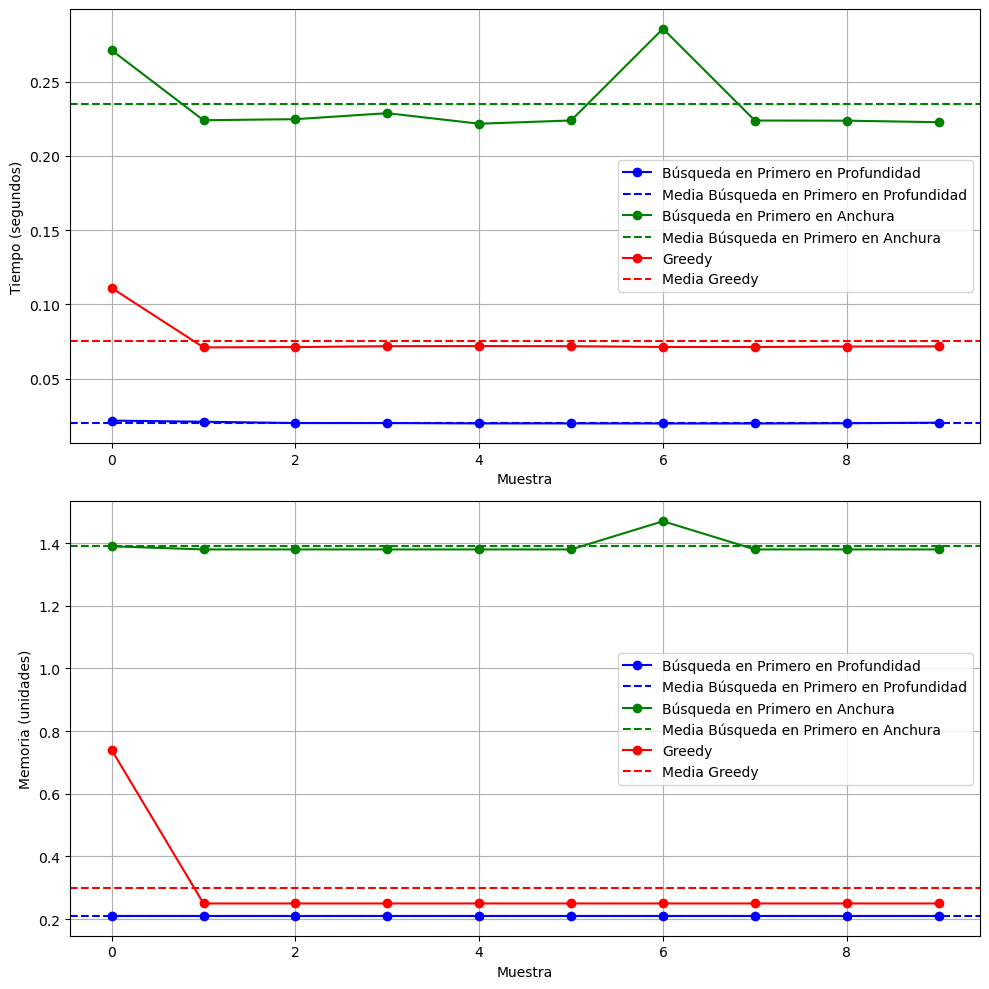

In [32]:
#Comparamos soluciones:
# Crear una lista de los DataFrames y sus nombres correspondientes
dataframes = [
    (resultados_busqueda_profundidad, "Búsqueda en Primero en Profundidad"),
    (resultados_busqueda_anchura, "Búsqueda en Primero en Anchura"),
    (resultados_greedy, "Greedy")
]
# Definir los colores para cada método
colors = {
    "Búsqueda en Primero en Profundidad": "blue",
    "Búsqueda en Primero en Anchura": "green",
    "Greedy": "red"
}
# Función para agregar las líneas de los métodos y las medias
# Función para agregar las líneas de los métodos y las medias
def plot_metrics(ax, metric, ylabel):
    for df, label in dataframes:
        color = colors[label]
        # Plotea las líneas de cada método
        ax.plot(df[metric], label=label, marker='o', color=color)
        # Plotea la línea de la media con el mismo color
        ax.axhline(df[metric].mean(), linestyle='--', color=color, label=f"Media {label}")

    ax.set_xlabel('Muestra')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Graficar el tiempo
plot_metrics(ax1, 'tiempo', 'Tiempo (segundos)')

# Graficar la memoria
plot_metrics(ax2, 'memoria', 'Memoria (unidades)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Como podemos ver, del grafico, el algoritmo de búsqueda en profundidad es el que menos tiempo requiere para encontrar la solucion y tambien menos recursos requiere, por otro lado, el método con mayor complejidad es búsqueda por anchura, quien consume mayor memoria y tiempo, es lógico, ya que es un método de búsqueda sin heurística, sino a fuerza bruta

In [33]:
#Cual es la complejidad relativa de cada algoritmo?
print('Media de memoria Primero en Anchura Vs.Media Búsqueda en profundidad', (resultados_busqueda_anchura['memoria'].mean()/resultados_busqueda_profundidad['memoria'].mean()), 'Veces Mayor')
print('Media de memoria Greedy Vs.Media Búsqueda en profundidad', (resultados_greedy['memoria'].mean()/resultados_busqueda_profundidad['memoria'].mean()), 'Veces Mayor')
print('Media de tiempo Primero en Anchura Vs.Media Búsqueda en profundidad', (resultados_busqueda_anchura['tiempo'].mean()/resultados_busqueda_profundidad['tiempo'].mean()), 'Veces Mayor')
print('Media de tiempo Greedy Vs.Media Búsqueda en profundidad', (resultados_greedy['tiempo'].mean()/resultados_busqueda_profundidad['tiempo'].mean()), 'Veces Mayor')


Media de memoria Primero en Anchura Vs.Media Búsqueda en profundidad 6.619047619047618 Veces Mayor
Media de memoria Greedy Vs.Media Búsqueda en profundidad 1.4238095238095239 Veces Mayor
Media de tiempo Primero en Anchura Vs.Media Búsqueda en profundidad 11.567079185093906 Veces Mayor
Media de tiempo Greedy Vs.Media Búsqueda en profundidad 3.7184325680600154 Veces Mayor


#### INCORPORAMOS LOS GRAFICOS DEL ARBOL Y VEMOS EL CAMINO HACIA LA SOLUCION DE CADA UNO DE LOS ALGORITMOS

In [38]:
### PRIMERO EN ANCHURA
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)

last_node = primero_en_anchura_grafico(problem_hanoi, display=False)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

Número optimo de movimientos: 31
Longitud del camino de la solución: 31.0


In [39]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5 2
HanoiState: 1 | 4 3 2 | 5
HanoiState:  | 4 3 2 1 | 5
HanoiState: 5 | 4 3 2 1 | 
HanoiState: 5 | 4 3 2 | 1
HanoiState: 5 2 | 4 3 | 1
HanoiState: 5 2 1 | 4 3 | 
HanoiState: 5 2 1 | 4 | 3
HanoiState: 5 2 | 4 1 | 3
HanoiState: 5 | 4 1 | 3 2
HanoiState: 5 | 4 | 3 2 1
HanoiState: 5 4 |  | 3 2 1
HanoiState: 5 4 1 |  | 3 2
HanoiState: 5 4 1 | 2 | 3
HanoiState: 5 4 | 2 1 | 3
HanoiState: 5 4 3 | 2 1 | 
HanoiState: 5 4 3 | 2 | 1
HanoiState: 5 4 3 2 |  | 1


In [41]:
### PRIMERO EN PROFUNDIDAD
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)

last_node = primero_en_profundidad_grafico(problem_hanoi, display=False)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

Número optimo de movimientos: 31
Longitud del camino de la solución: 121.0


In [42]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 | 5 4 3 1
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 1 | 2 | 5 4
HanoiState: 3 1 |  | 5 4 2
HanoiState: 3 |  | 5 4 2 1
HanoiState: 3 | 1 | 5 4 2
HanoiState: 3 2 | 1 | 5 4
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 | 5 1
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState: 3 1 | 4 | 5 2
HanoiState: 3 1 | 4 2 | 5
HanoiState: 3 | 4 2 | 5 1
HanoiState: 3 | 4 2 1 | 5
HanoiState:  | 4 2 1 | 5 3
HanoiState:  | 4 2 | 5 3 1
HanoiState: 1 | 4 2 | 5 3
HanoiState: 1 | 4 | 5 3 2
HanoiState:  | 4 | 5 3 2 1
HanoiState:  | 4 1 | 5 3 2
HanoiState: 2 | 4 1 | 5 3
HanoiState: 2 | 4 | 5 3 1
HanoiState: 2 1 | 4 | 5 3
HanoiState: 2 1 | 4 3 | 5
HanoiState: 2 | 4 3 | 5 1
HanoiState: 2 | 4 3 1 | 5
HanoiState:  | 4 3 1 | 5 2
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5

In [43]:
### GREEDY
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)

last_node = greedy_grafico(problem_hanoi, display=False)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

Número optimo de movimientos: 31
Longitud del camino de la solución: 31.0


In [44]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5 2
HanoiState: 1 | 4 3 2 | 5
HanoiState:  | 4 3 2 1 | 5
HanoiState: 5 | 4 3 2 1 | 
HanoiState: 5 | 4 3 2 | 1
HanoiState: 5 2 | 4 3 | 1
HanoiState: 5 2 1 | 4 3 | 
HanoiState: 5 2 1 | 4 | 3
HanoiState: 5 2 | 4 1 | 3
HanoiState: 5 | 4 1 | 3 2
HanoiState: 5 | 4 | 3 2 1
HanoiState: 5 4 |  | 3 2 1
HanoiState: 5 4 1 |  | 3 2
HanoiState: 5 4 1 | 2 | 3
HanoiState: 5 4 | 2 1 | 3
HanoiState: 5 4 3 | 2 1 | 
HanoiState: 5 4 3 | 2 | 1
HanoiState: 5 4 3 2 |  | 1
